﻿In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.


In this capstone, you will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.


The dataset provided has the following columns of multiple-choice data:

- body_type
- diet
- drinks
- drugs
- education
- ethnicity
- height
- income
- job
- offspring
- orientation
- pets
- religion
- sex
- sign
- smokes
- speaks
- status

And a set of open short-answer responses to :

- essay0 - My self summary
- essay1 - What I’m doing with my life
- essay2 - I’m really good at
- essay3 - The first thing people usually notice about me
- essay4 - Favorite books, movies, show, music, and food
- essay5 - The six things I could never do without
- essay6 - I spend a lot of time thinking about
- essay7 - On a typical Friday night I am
- essay8 - The most private thing I am willing to admit
- essay9 - You should message me if…


### Introduction


In this capstone, you will create a presentation about your findings in this OkCupid dataset.


The purpose of this capstone is to practice formulating questions and implementing Machine Learning techniques to answer those questions. We will give you guidance about the kinds of questions we asked, and the kinds of methods we used to answer those questions. But the questions you ask and how you answer them are entirely up to you. We're excited to see what kinds of different things you explore.
Compared to the other projects you have completed this far, we are requiring few restrictions on how you structure your code. The project is far more open-ended, and you should use your creativity. In addition, much of the code you write for later parts of this project will depend on how you decided to implement earlier parts. **Therefore, we strongly encourage you to read through the entire assignment before writing any code.**
________________


# Imports

In [287]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler

#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#Linear Regression
from sklearn.linear_model import LinearRegression


### Load in the DataFrame


The data is stored in **profiles.csv**. We can start to work with it in **dating.py** by using Pandas, which we have imported for you with the line:


```
import pandas as pd
```


and then loading the csv into a DataFrame: 


```
df = pd.read_csv("profiles.csv")
```


In [288]:
df = pd.read_csv("profiles.csv")

In [289]:
df

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,NaN,NaN,socially,never,graduated from college/university,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",...,"oakland, california",has kids,straight,has dogs,catholicism but not too serious about it,f,cancer and it&rsquo;s fun to think about,no,english,single
59942,24,fit,mostly anything,often,sometimes,working on college/university,i'm nick.<br />\ni never know what to write ab...,currently finishing school for film production...,"<a class=""ilink"" href=""/interests?i=filmmaking...","dude, i don't know.",...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,leo but it doesn&rsquo;t matter,no,english (fluently),single
59943,42,average,mostly anything,not at all,never,graduated from masters program,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively<br />\n- getti...,i'm quiet until i get used to the environment ...,...,"south san francisco, california",doesn&rsquo;t have kids,straight,NaN,christianity but not too serious about it,m,sagittarius but it doesn&rsquo;t matter,no,english (fluently),single
59944,27,athletic,mostly anything,socially,often,working on college/university,"""all i have in this world are my balls and my ...","following my dreams...<br />\n""you got a dream...",listening,it used to be the hair until i mowed it off bu...,...,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,leo and it&rsquo;s fun to think about,trying 

### Explore the Data


Let's make sure we understand what these columns represent!

Pick some columns and call `.head()` on them to see the first five rows of data. For example, we were curious about `job`, so we called:


```
df.job.head()
```


You can also call `value_counts()` on a column to figure out what possible responses there are, and how many of each response there was.




In [290]:
df['job'].head()

0                 transportation
1           hospitality / travel
2                            NaN
3                        student
4    artistic / musical / writer
Name: job, dtype: object

In [291]:
df['body_type'].value_counts()

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64

In [292]:
df['location'].value_counts()

san francisco, california      31064
oakland, california             7214
berkeley, california            4212
san mateo, california           1331
palo alto, california           1064
                               ...  
seattle, washington                1
waterford, california              1
milwaukee, wisconsin               1
miami, florida                     1
san luis obispo, california        1
Name: location, Length: 199, dtype: int64

### Visualize some of the Data


We can start to build graphs from the data by first importing Matplotlib:


```
from matplotlib import pyplot as plt
```


and then making some plots!

For example, we were curious about the distribution of ages on the site, so we made a histogram of the `age` column:


```
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()
```


Try this code in your own file and take a look at the histogram it produces!




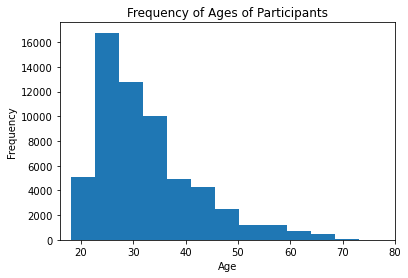

In [293]:
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(16, 80)
plt.title('Frequency of Ages of Participants')
plt.show()

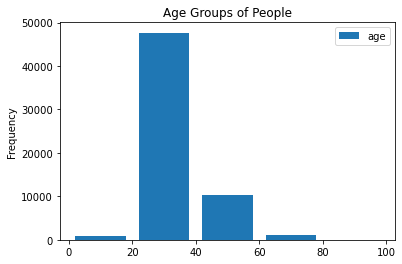

In [294]:
df[['age']].plot(kind="hist",bins=[0,20,40,60,80,100],rwidth=0.8, title='Age Groups of People')

In [295]:
print(df['education'].value_counts())
df.groupby(['education','drugs']).count()

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

age  body_type  diet  drinks  \
education                         drugs                                     
college/university                never      523        491   278     502   
                                  often        2          2     2       2   
                                  sometimes   84         77    62      82   
dropped out of college/university never      460        432   306     454   
                                  often       19         19    13      19   
...                                          ...        ...   ...     ...   
working on space camp             often       14         12    13      13   
                                  sometimes  102         95    78     101   
working on two-year college       never      708        666   415     684   
                                  often       16         15    10      15   
                                  sometimes  197        183   138     196   

                                             essay0  essay1  essay2  essay3  \
education                         drugs                                       
college/university                never         455     411     385     368   
                                  often           2       2       2       2   
                                  sometimes      74      72      70      65   
dropped out of college/university never         417     412     406     392   
                                  often          18      15      17      14   
...                                             ...     ...     ...     ...   
working on space camp             often          14      13      13      13   
                                  sometimes      95      92      90      90   
working on two-year college       never         635     636     604     601   
                                  often          15      14      15      14   
                                  sometimes     182     179     171     173   

                                             essay4  essay5  ...  location  \
education                         drugs                      ...             
college/university                never         358     372  ...       523   
                                  often           2       2  ...         2   
                                  sometimes      70      63  ...        84   
dropped out of college/university never         394     393  ...       460   
                                  often          15      13  ...        19   
...                                             ...     ...  ...       ...   
working on space camp             often          13      13  ...        14   
                                  sometimes      90      90  ...       102   
working on two-year college       never         570     578  ...       708   
                                  often          11      12  ...        16   
                                  sometimes     166     165  ...       197   

                                             offspring  orientation  pets  \
education                         drugs                                     
college/university                never            223          523   287   
                                  often              1            2     1   
                                  sometimes         38           84    62   
dropped out of college/university never            262          460   362   
                                  often             11           19    16   
...                                                ...          ...   ...   
working on space camp             often              8           14    12   
                                  sometimes         42          102    82   
working on two-year college       never            349          708   534   
                                  often             10           16    12   
                                  sometimes         87          197   156   

In [296]:
education = df['education'].value_counts().reset_index()
education.columns=["Education Type", "Count"]
body_type = df['body_type'].value_counts().reset_index()
body_type.columns=["Body Type", "Count"]
sign_type = df['sign'].value_counts().reset_index()
sign_type.columns=["Sign Type", "Count"]

In [297]:
len(education['Education Type'])

32

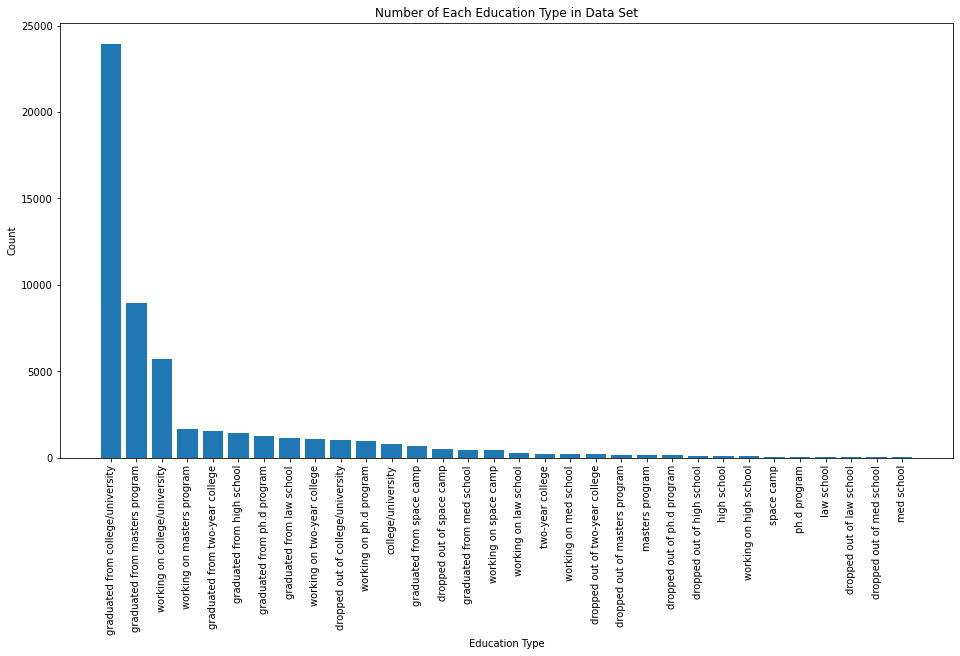

In [298]:
plt.figure(figsize=(16,8))
plt.bar(education['Education Type'],education['Count'])
plt.xticks(rotation=90) 
plt.title("Number of Each Education Type in Data Set")
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.savefig("Number of Each Education Type in Data Set.png")
#plt.show()
#plt.show()

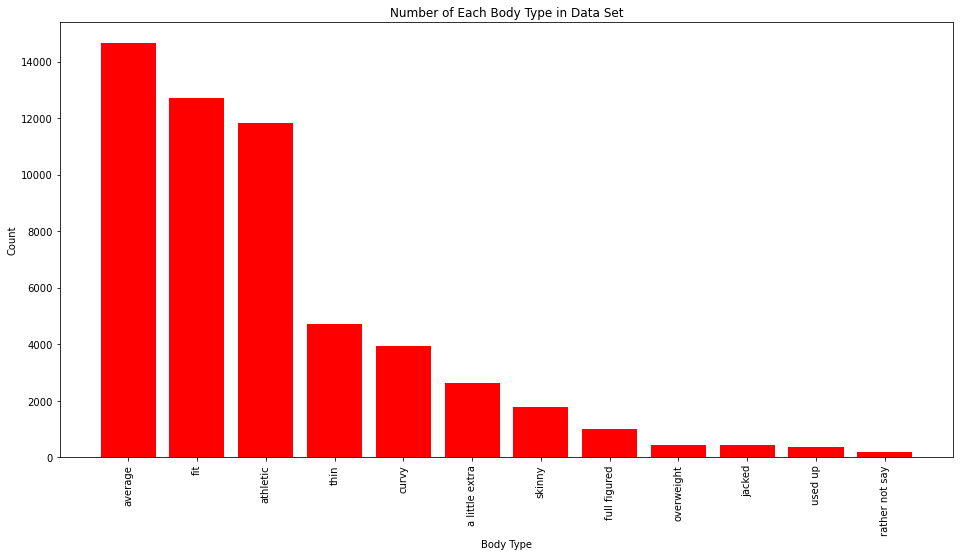

In [299]:
plt.figure(figsize=(16,8))
plt.bar(body_type['Body Type'],body_type['Count'], color='red')
plt.xticks(rotation=90) 
plt.title("Number of Each Body Type in Data Set")
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.savefig("Number of Each Body Type in Data Set.png")
#plt.show()

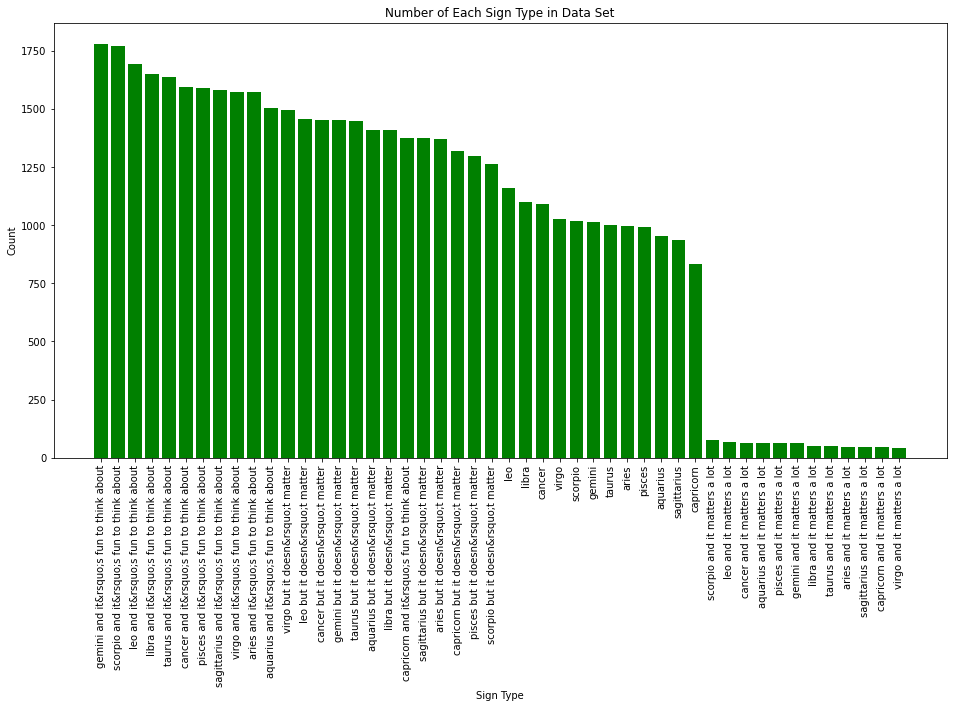

In [300]:
plt.figure(figsize=(16,8))
plt.bar(sign_type['Sign Type'],sign_type['Count'], color='green')
plt.xticks(rotation=90) 
plt.title("Number of Each Sign Type in Data Set")
plt.xlabel('Sign Type')
plt.ylabel('Count')
plt.savefig("Number of Each Sign Type in Data Set.png")

In [301]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [302]:
df.reset_index(inplace=True)

In [303]:
df

,index,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59941,59,NaN,NaN,socially,never,graduated from college/university,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,...,"oakland, california",has kids,straight,has dogs,catholicism but not too serious about it,f,cancer and it&rsquo;s fun to think about,no,english,single
59942,59942,24,fit,mostly anything,often,sometimes,working on college/university,i'm nick.<br />\ni never know what to write ab...,currently finishing school for film production...,"<a class=""ilink"" href=""/interests?i=filmmaking...",...,"san francisco, california",doesn&rsquo;t have kids,straight,likes dogs and likes cats,agnosticism,m,leo but it doesn&rsquo;t matter,no,english (fluently),single
59943,59943,42,average,mostly anything,not at all,never,graduated from masters program,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively<br />\n- getti...,...,"south san francisco, california",doesn&rsquo;t have kids,straight,NaN,christianity but not too serious about it,m,sagittarius but it doesn&rsquo;t matter,no,english (fluently),single
59944,59944,27,athletic,mostly anything,socially,often,working on college/university,"""all i have in this world are my balls and my ...","following my dreams...<br />\n""you got a dream...",listening,...,"san francisco, california","doesn&rsquo;t have kids, but wants them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,leo and it&rsquo;s fun to think about,trying to quit,"english (fluently), spanish (poorly), chinese ...",single


In [304]:
#drugs_diet_cnts = df[['drugs','diet']].value_counts()
drugs_diet_cnts = df.reset_index().groupby(['drugs','diet'])['index'].nunique() #agg(lambda x: x.nunique())

In [305]:
drug_diet_cnts = drugs_diet_cnts.reset_index().rename(columns={"index": "count"})

In [306]:
drug_diet_cnts.head()

,drugs,diet,count
0,never,anything,4050
1,never,halal,6
2,never,kosher,9
3,never,mostly anything,11006
4,never,mostly halal,26


### Formulate a Question


As we started to look at this data, we started to get more and more curious about Zodiac signs. First, we looked at all of the possible values for Zodiac signs:


```
df.sign.value_counts()
```


We started to wonder if there was a way to predict a user's Zodiac sign from the information in their profile. Thinking about the columns we had already explored, we thought that maybe we could classify Zodiac signs using drinking, smoking, drugs, and essays as our features.

In [307]:
signs_selection = ['aries', 'cancer', 'libra', 'capricorn',
        'taurus', 'leo', 'scorpio', 'aquarius',
        'gemini', 'virgo', 'sagittarius', 'pisces']

In [308]:
[type(s) for s in signs_selection]

[str, str, str, str, str, str, str, str, str, str, str, str]

In [309]:
df['sign_format_type'] = [str(type(s)) for s in list(df['sign'])]

In [310]:
tmp = df[['sign','sign_format_type']]
tmp[~tmp['sign_format_type'].str.contains('str')]

,sign,sign_format_type
13,NaN,<class 'float'>
28,NaN,<class 'float'>
31,NaN,<class 'float'>
35,NaN,<class 'float'>
39,NaN,<class 'float'>
...,...,...
59924,NaN,<class 'float'>
59926,NaN,<class 'float'>
59931,NaN,<class 'float'>
59933,NaN,<class 'float'>


In [311]:
df['sign'].fillna("unknown", inplace=True)

In [312]:
df['sign'].isin(signs_selection)

0         True
1         True
2        False
3         True
4         True
         ...  
59941    False
59942    False
59943    False
59944    False
59945    False
Name: sign, Length: 59946, dtype: bool

In [313]:
range(len(df['sign']))

range(0, 59946)

In [314]:
df['sign_selection'] = None
for selection in signs_selection:
    for sign in range(len(df['sign'])):
        if selection in df['sign'][sign]:
            df['sign_selection'][sign] = selection

<ipython-input-314-1c12b2fb58af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sign_selection'][sign] = selection


In [315]:
df['sign_selection'].fillna('unknown',inplace=True)

In [316]:
df.assign(dummy=1).groupby(['dummy','drinks']).size()

dummy  drinks     
1      desperately      322
       not at all      3267
       often           5164
       rarely          5957
       socially       41780
       very often       471
dtype: int64

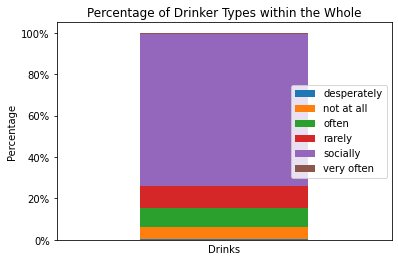

In [317]:
df.assign(dummy=1).groupby(['dummy','drinks']).size().groupby(level=0) \
.apply(lambda x: 100 * x / x.sum()).to_frame().unstack().plot(kind='bar', stacked=True, legend=False)
plt.xlabel('Drinks')
plt.xticks([])
plt.ylabel('Percentage')
plt.legend(df.groupby('drinks').nunique()['drinks'].to_frame().index)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Percentage of Drinker Types within the Whole")
#axs[1].plot(x, -y)
plt.savefig("Percentage of Drinker Types within the Whole.png")
plt.show() 

In [318]:
df.columns

Index(['index', 'age', 'body_type', 'diet', 'drinks', 'drugs', 'education',
       'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6',
       'essay7', 'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status',
       'sign_format_type', 'sign_selection'],
      dtype='object')

In [319]:
[i+", " + y for i,y in df.groupby(['drinks','smokes']).nunique().index]

['desperately, no',
 'desperately, sometimes',
 'desperately, trying to quit',
 'desperately, when drinking',
 'desperately, yes',
 'not at all, no',
 'not at all, sometimes',
 'not at all, trying to quit',
 'not at all, when drinking',
 'not at all, yes',
 'often, no',
 'often, sometimes',
 'often, trying to quit',
 'often, when drinking',
 'often, yes',
 'rarely, no',
 'rarely, sometimes',
 'rarely, trying to quit',
 'rarely, when drinking',
 'rarely, yes',
 'socially, no',
 'socially, sometimes',
 'socially, trying to quit',
 'socially, when drinking',
 'socially, yes',
 'very often, no',
 'very often, sometimes',
 'very often, trying to quit',
 'very often, when drinking',
 'very often, yes']

In [320]:
[i for i,y in df.groupby(['drinks','smokes']).nunique().index]

['desperately',
 'desperately',
 'desperately',
 'desperately',
 'desperately',
 'not at all',
 'not at all',
 'not at all',
 'not at all',
 'not at all',
 'often',
 'often',
 'often',
 'often',
 'often',
 'rarely',
 'rarely',
 'rarely',
 'rarely',
 'rarely',
 'socially',
 'socially',
 'socially',
 'socially',
 'socially',
 'very often',
 'very often',
 'very often',
 'very often',
 'very often']

In [321]:
drink_types = [i for i in df.groupby(['drinks']).nunique()['drinks'].to_frame().index]

In [322]:
list(set([i for i,j in df.groupby(['drinks','smokes']).nunique()['drinks'].to_frame().index]))

['socially', 'not at all', 'desperately', 'rarely', 'often', 'very often']

Text(0.5, 1.0, 'Drinkers who Smoke by Percentage')

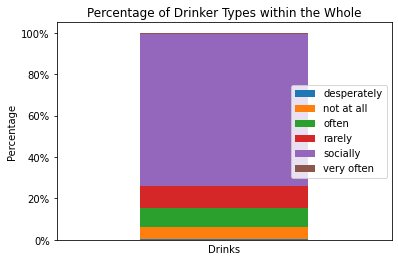

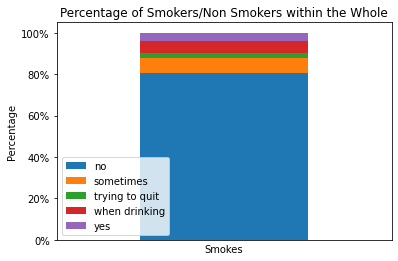

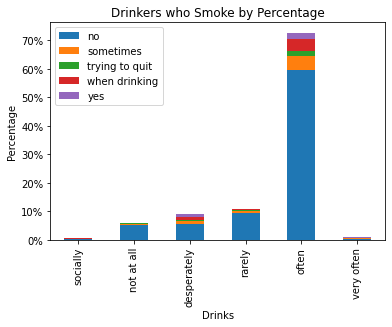

In [323]:
#fig,ax = plt.subplots()

df.assign(dummy=1).groupby(['dummy','drinks']).size().groupby(level=0) \
.apply(lambda x: 100 * x / x.sum()).to_frame().unstack().plot(kind='bar', stacked=True, legend=False)
plt.xlabel('Drinks')
plt.xticks([])
plt.ylabel('Percentage')
plt.legend(df.groupby(['drinks']).nunique()['drinks'].to_frame().index)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Percentage of Drinker Types within the Whole")
#plt.show() 

df.assign(dummy=1).groupby(['dummy','smokes']).size().groupby(level=0) \
.apply(lambda x: 100 * x / x.sum()).to_frame().unstack().plot(kind='bar', stacked=True, legend=False)
plt.xlabel('Smokes')
plt.xticks([])
plt.ylabel('Percentage')
plt.legend(df.groupby(['smokes']).nunique()['smokes'].to_frame().index)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Percentage of Smokers/Non Smokers within the Whole")


df.assign(dummy=1).groupby(['dummy','drinks','smokes']).size().groupby(level=0) \
.apply(lambda x: 100 * x / x.sum()).to_frame().unstack().plot(kind='bar', stacked=True,legend=False)
#plt.xlabel(list(set([i for i,j in df.groupby(['drinks','smokes']).nunique()['drinks'].to_frame().index])))
plt.xticks(range(len(list(set([i for i,j in df.groupby(['drinks','smokes']).nunique()['drinks'].to_frame().index])))), list(set([i for i,j in df.groupby(['drinks','smokes']).nunique()['drinks'].to_frame().index])))
plt.xlabel('Drinks')
plt.ylabel('Percentage')
plt.legend(df.groupby(['smokes']).nunique()['smokes'].to_frame().index)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Drinkers who Smoke by Percentage")
#plt.show()
#fig.savefig("test.png")

In [324]:
df.groupby(['drinks','smokes']).size().to_frame().reset_index().rename(columns={0:'count'})

,drinks,smokes,count
0,desperately,no,164
1,desperately,sometimes,35
2,desperately,trying to quit,21
3,desperately,when drinking,33
4,desperately,yes,36
5,not at all,no,2771
6,not at all,sometimes,159
7,not at all,trying to quit,114
8,not at all,when drinking,13
9,not at all,yes,149


In [325]:
df.assign(dummy=1).groupby(['dummy','drinks','smokes']).size().groupby(level=0) \
.apply(lambda x: 100 * x / x.sum()).to_frame().unstack()

1                                                 
smokes                    no sometimes trying to quit when drinking       yes
dummy drinks                                                                 
1     desperately   0.307105  0.065541       0.039324      0.061795  0.067413
      not at all    5.188944  0.297742       0.213475      0.024344  0.279016
      often         5.469833  1.129171       0.406352      0.902588  1.067376
      rarely        9.512752  0.582375       0.282761      0.222838  0.308977
      socially     59.735590  4.799446       1.737763      4.333171  2.134752
      very often    0.333321  0.114228       0.037452      0.106738  0.237819

In [326]:
tmp = df.groupby(['drinks','smokes']).size().to_frame().reset_index().rename(columns={0:'count'})
tmp['percentage_of_whole'] = tmp['count'].div(tmp['count'].sum(), axis=0)

In [327]:
tmp[tmp['smokes']!='no'].sort_values('percentage_of_whole',ascending=False).reset_index(drop=True)

,drinks,smokes,count,percentage_of_whole
0,socially,sometimes,2563,0.047994
1,socially,when drinking,2314,0.043332
2,socially,yes,1140,0.021348
3,socially,trying to quit,928,0.017378
4,often,sometimes,603,0.011292
5,often,yes,570,0.010674
6,often,when drinking,482,0.009026
7,rarely,sometimes,311,0.005824
8,often,trying to quit,217,0.004064
9,rarely,yes,165,0.003090


In [328]:
#tmp['percentage_of_whole'] = pd.Series(["{:.2f}%".format(i * 100) for i in tmp['percentage_of_whole']], index=tmp.index)
#pd.Series(["{0:.2f}%".format(val * 100) for val in df['var3']], index = df.index)

In [329]:
#tmp['percentage_of_whole']

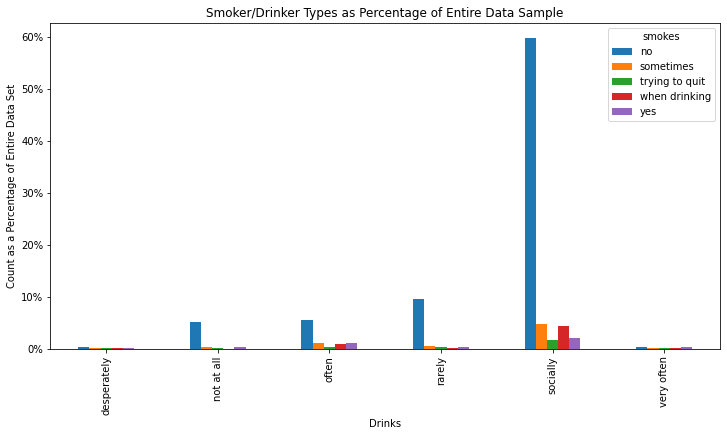

In [330]:
df_pivot = pd.pivot_table(tmp,
values="percentage_of_whole",
index="drinks",
columns="smokes",
#aggfunc=np.sum
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(12, 6)
# Change the axes labels
ax.set_xlabel("Drinks")
ax.set_ylabel("Count as a Percentage of Entire Data Set")
ax.set_title('Smoker/Drinker Types as Percentage of Entire Data Sample')
# Change y axis to be a percentage
fig.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
fig.savefig("Smoker and Drinker Types as Percentage of Entire Data Sample.png")

Text(0.5, 1.0, 'Count of Drinker/Smoker Types')

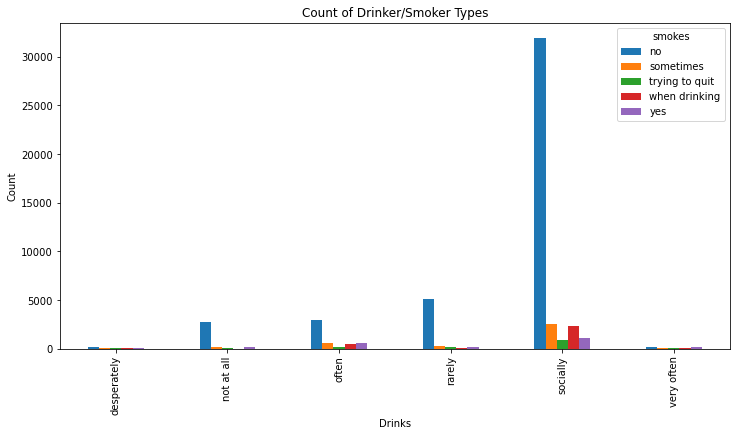

In [331]:
df_pivot = pd.pivot_table(df.groupby(['drinks','smokes']).size().to_frame().reset_index().rename(columns={0:'count'}),
values="count",
index="drinks",
columns="smokes",
aggfunc=np.sum
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(12, 6)
# Change the axes labels
ax.set_xlabel("Drinks")
ax.set_ylabel("Count")
ax.set_title('Count of Drinker/Smoker Types')

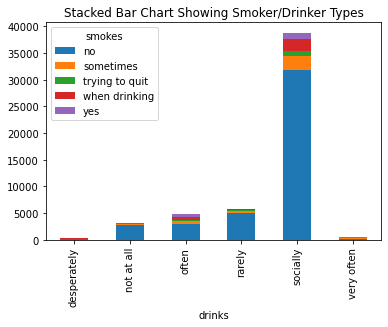

In [332]:
df.groupby(['drinks','smokes']).size().unstack().plot(kind='bar',stacked=True) #doing stacked = False makes the same chart as above
plt.title('Stacked Bar Chart Showing Smoker/Drinker Types')
plt.show()

### Augment your Data


In order to answer the question you've formulated, you will probably need to create some new columns in the DataFrame. This is especially true because so much of our data here is categorical (i.e. `diet` consists of the options `vegan`, `vegetarian`, `anything`, etc. instead of numerical values).


Categorical data is great to use as labels, but we want to create some numerical data as well to use for features.


For our question about Zodiac signs, we wanted to transform the `drinks` column into numerical data. We used:


```
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}


all_data["drinks_code"] = all_data.drinks.map(drink_mapping)
```


These lines of code created a new column called 'drinks_code' that mapped the following `drinks` values to these numbers:


| drinks      | drinks_code |
|-------------|-------------|
| not at all  | 0           |
| rarely      | 1           |
| socially    | 2           |
| often       | 3           |
| very often  | 4           |
| desperately | 5           |


We did the same for `smokes` and `drugs`.


We also wanted some numerical data about the short answer essays. We combined them all into one string, took out the `NaN`s, and then created a new column called `essay_len`:


```
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]


# Removing the NaNs
all_essays = all_data[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)


all_data["essay_len"] = all_essays.apply(lambda x: len(x)))
```


We also created a column with average word length and a column with the frequency of the words "I" or "me" appearing in the essays.


In [333]:
essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]

# Removing the NaNs and changing them to 'blank' because if they were string '' then there is no length and it screws things up below
all_essays = df[essay_cols].replace(np.nan, 'blank', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)

df["essay_len"] = all_essays.apply(lambda x: len(x)) #length in characters

In [334]:
all_essays.columns=['text']

In [335]:
all_essays = pd.DataFrame(all_essays, columns=['text'])

In [336]:
all_essays['words_count'] = all_essays.apply(lambda words: len(words['text'].split()), axis=1) #amount of words

In [337]:
all_essays['words']  = all_essays.apply(lambda words: words['text'].split(), axis=1) #splitting words
#average length of words
all_essays['average_length_of_words'] = all_essays.apply(lambda average_length_of_words: sum(map(len, average_length_of_words['words']))/len(average_length_of_words['words']), axis=1)

In [338]:
len(all_essays[all_essays['average_length_of_words'].isna()])

0

In [339]:
#Drink map code, signs map code, serious_about_religion (0,1)

In [340]:
df['diet'].fillna('unknown',inplace=True)
df['education'].fillna('unknown',inplace=True)
df['sign_selection'].fillna('unknown',inplace=True)
df['religion'].fillna('unknown',inplace=True)
df['drinks'].fillna('unknown',inplace=True)
df['smokes'].fillna('unknown',inplace=True)

In [341]:
#drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
drinks_mapping = {k: v for v, k in enumerate(df['drinks'].value_counts().reset_index()['index'])}
df["drinks_code"] = df['drinks'].map(drinks_mapping)

In [342]:
#signs_mapping = {k: v for v, k in enumerate(signs_selection)}
signs_mapping = {k: v for v, k in enumerate(df['sign'].value_counts().reset_index()['index'])}
df["signs_code"] = df['sign_selection'].map(signs_mapping)

In [343]:
df['drinks'].value_counts()

socially       41780
rarely          5957
often           5164
not at all      3267
unknown         2985
very often       471
desperately      322
Name: drinks, dtype: int64

In [344]:
diet_mapping = {k: v for v, k in enumerate(df['diet'].value_counts().reset_index()['index'])}
df['diet_code'] = df['diet'].map(diet_mapping)

In [345]:
smokes_mapping = {k: v for v, k in enumerate(df['smokes'].value_counts().reset_index()['index'])}
df['smokes_code'] = df['smokes'].map(smokes_mapping)

In [346]:
education_mapping = {k: v for v, k in enumerate(df['education'].value_counts().reset_index()['index'])}
df['education_code'] = df['education'].map(education_mapping)

In [347]:
#serious about religion or not. the idea being there are many people serious about religion and that effects the other actions (diet, smoking, drinking)

In [348]:
df['serious_about_religion'] = np.where(((df['religion'] == 'catholicism')
                                        | (df['religion']=='judaism') 
                                        | (df['religion']=='christianity') 
                                        | (df['religion']=='buddhism')
                                        | (df['religion']=='hinduism')
                                        | (df['religion']=='islam'))
                                        | (df['religion'].str.contains("somewhat|very")) & (df['religion'].str.contains(("catholicism|judaism|christianity|buddhism|hinduism|islam"))),
                                        1, 0)

In [349]:
#serious abotu astrology
df['serious_about_astrology'] = np.where(((df['sign'] == 'leo')
                                        | (df['sign']=='libra') 
                                        | (df['sign']=='cancer') 
                                        | (df['sign']=='virgo')
                                        | (df['sign']=='scorpio')
                                        | (df['sign']=='gemini')
                                        | (df['sign']=='taurus')
                                        | (df['sign']=='aries')
                                        | (df['sign']=='pisces')
                                        | (df['sign']=='aquarius')
                                        | (df['sign']=='sagittarius')
                                        | (df['sign']=='capricorn'))
                                        | (df['sign'].str.contains("fun|matters a lot")),
                                        1, 0)

In [350]:
df['serious_about_religion'].value_counts()

0    52776
1     7170
Name: serious_about_religion, dtype: int64

In [351]:
df['religion'].value_counts()

unknown                                       20226
agnosticism                                    2724
other                                          2691
agnosticism but not too serious about it       2636
agnosticism and laughing about it              2496
catholicism but not too serious about it       2318
atheism                                        2175
other and laughing about it                    2119
atheism and laughing about it                  2074
christianity                                   1957
christianity but not too serious about it      1952
other but not too serious about it             1554
judaism but not too serious about it           1517
atheism but not too serious about it           1318
catholicism                                    1064
christianity and somewhat serious about it      927
atheism and somewhat serious about it           848
other and somewhat serious about it             846
catholicism and laughing about it               726
judaism and 

In [352]:
#merge essays words count and average length of words columns into df. then run the np.where one
finaldf = pd.merge(df, all_essays, left_index=True, right_index=True)
#average_length of words > than mean
finaldf['uses_longer_than_average_words']= np.where(finaldf['average_length_of_words'] > finaldf['average_length_of_words'].mean(), 1, 0)

In [390]:
finaldf['education'].value_counts()

graduated from college/university    23959
graduated from masters program        8961
unknown                               6628
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out

In [354]:
#categories for each person who is serious about religion and their religion and those who are not serious at all
#this matters because those who are serious about religion tend to be attracted to others' of their religion
#never got too much further with this

In [355]:
religions = ['catholicism','judaism','christianity','buddhism','hinduism','islam']
less_serious_words = ['laughing','not too']

In [356]:
df[df['sign_selection'].isna()]

,index,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,...,sign_format_type,sign_selection,essay_len,drinks_code,signs_code,diet_code,smokes_code,education_code,serious_about_religion,serious_about_astrology


#### Relationship Between Possible Feature Columns -  Graphs and Metrics

Text(0.5, 1.0, 'People who are Religious and into Astrology by Percentage')

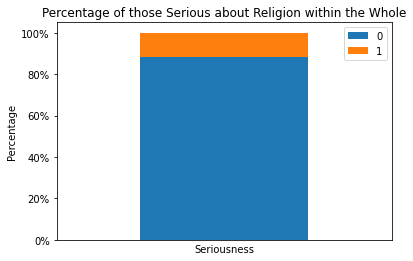

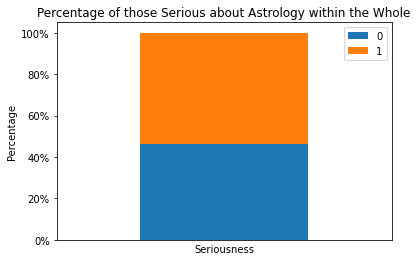

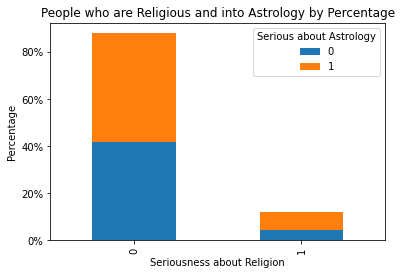

In [367]:
df.assign(dummy=1).groupby(['dummy','serious_about_religion']).size().groupby(level=0) \
.apply(lambda x: 100 * x / x.sum()).to_frame().unstack().plot(kind='bar', stacked=True, legend=False)
plt.xlabel('Seriousness')
plt.xticks([])
plt.ylabel('Percentage')
plt.legend(df.groupby(['serious_about_religion']).nunique()['serious_about_religion'].to_frame().index)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Percentage of those Serious about Religion within the Whole")
#plt.show() 

df.assign(dummy=1).groupby(['dummy','serious_about_astrology']).size().groupby(level=0) \
.apply(lambda x: 100 * x / x.sum()).to_frame().unstack().plot(kind='bar', stacked=True, legend=False)
plt.xlabel('Seriousness')
plt.xticks([])
plt.ylabel('Percentage')
plt.legend(df.groupby(['serious_about_astrology']).nunique()['serious_about_astrology'].to_frame().index)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Percentage of those Serious about Astrology within the Whole")


df.assign(dummy=1).groupby(['dummy','serious_about_religion','serious_about_astrology']).size().groupby(level=0) \
.apply(lambda x: 100 * x / x.sum()).to_frame().unstack().plot(kind='bar', stacked=True,legend=False)
#plt.xlabel(list(set([i for i,j in df.groupby(['drinks','smokes']).nunique()['drinks'].to_frame().index])))
plt.xticks(range(len(list(set([i for i,j in df.groupby(['serious_about_religion','serious_about_astrology']).nunique()['serious_about_religion'].to_frame().index])))), list(set([i for i,j in df.groupby(['serious_about_religion','serious_about_astrology']).nunique()['serious_about_religion'].to_frame().index])))
plt.xlabel('Seriousness about Religion')
plt.ylabel('Percentage')
plt.legend(df.groupby(['serious_about_astrology']).nunique()['serious_about_astrology'].to_frame().index, title='Serious about Astrology')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("People who are Religious and into Astrology by Percentage")

In [373]:
finaldf

,index,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,...,diet_code,smokes_code,education_code,serious_about_religion,serious_about_astrology,text,words_count,words,average_length_of_words,uses_longer_than_average_words
0,0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,...,3,2,3,0,1,about me:<br />\n<br />\ni would love to think...,485,"[about, me:<br, />, <br, />, i, would, love, t...",4.453608,0
1,1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,...,5,0,16,0,1,i am a chef: this is what that means.<br />\n1...,282,"[i, am, a, chef:, this, is, what, that, means....",4.226950,0
2,2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,...,2,0,1,0,0,"i'm not ashamed of much, but writing public te...",889,"[i'm, not, ashamed, of, much,, but, writing, p...",5.212598,1
3,3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,...,7,0,3,0,1,i work in a library and go to school. . . read...,82,"[i, work, in, a, library, and, go, to, school....",5.012195,1
4,4,29,athletic,unknown,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,...,0,0,0,0,1,hey how's it going? currently vague on the pro...,120,"[hey, how's, it, going?, currently, vague, on,...",5.258333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59941,59,NaN,unknown,socially,never,graduated from college/university,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,...,0,0,0,0,1,"vibrant, expressive, caring optimist. i love b...",304,"[vibrant,, expressive,, caring, optimist., i, ...",4.437500,0
59942,59942,24,fit,mostly anything,often,sometimes,working on college/university,i'm nick.<br />\ni never know what to write ab...,currently finishing school for film production...,"<a class=""ilink"" href=""/interests?i=filmmaking...",...,1,0,3,0,0,i'm nick.<br />\ni never know what to write ab...,456,"[i'm, nick.<br, />, i, never, know, what, to, ...",5.574561,1
59943,59943,42,average,mostly anything,not at all,never,graduated from masters program,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively<br />\n- getti...,...,1,0,1,0,0,"hello! i enjoy traveling, watching movies, and...",318,"[hello!, i, enjoy, traveling,, watching, movie...",4.830189,1
59944,59944,27,athletic,mostly anything,socially,often,working on college/university,"""all i have in this world are my balls and my ...","following my dreams...<br />\n""you got a dream...",listening,...,1,5,3,0,1,"""all i have in this world are my balls and my ...",366,"[""all, i, have, in, this, world, are, my, ball...",4.461749,0


In [387]:
list(finaldf.groupby(['education']).count().index)

['college/university',
 'dropped out of college/university',
 'dropped out of high school',
 'dropped out of law school',
 'dropped out of masters program',
 'dropped out of med school',
 'dropped out of ph.d program',
 'dropped out of space camp',
 'dropped out of two-year college',
 'graduated from college/university',
 'graduated from high school',
 'graduated from law school',
 'graduated from masters program',
 'graduated from med school',
 'graduated from ph.d program',
 'graduated from space camp',
 'graduated from two-year college',
 'high school',
 'law school',
 'masters program',
 'med school',
 'ph.d program',
 'space camp',
 'two-year college',
 'unknown',
 'working on college/university',
 'working on high school',
 'working on law school',
 'working on masters program',
 'working on med school',
 'working on ph.d program',
 'working on space camp',
 'working on two-year college']

'\nfinaldf.assign(dummy=1).groupby([\'dummy\',\'education_code\']).size().groupby(level=0) .apply(lambda x: 100 * x / x.sum()).to_frame().unstack().plot(kind=\'bar\', stacked=True, legend=False)\nplt.xlabel(\'Education Code\')\nplt.xticks([])\nplt.ylabel(\'Percentage\')\nplt.legend(finaldf.groupby([\'education_code\']).count().index)\nplt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())\nplt.title("Percentage of in Various Education Codes within the Whole")\n\n\nfinaldf.assign(dummy=1).groupby([\'dummy\',\'uses_longer_than_average_words\',\'education_code\']).size().groupby(level=0) .apply(lambda x: 100 * x / x.sum()).to_frame().unstack().plot(kind=\'bar\', stacked=True,legend=False)\n#plt.xlabel(list(set([i for i,j in df.groupby([\'drinks\',\'smokes\']).nunique()[\'drinks\'].to_frame().index])))\nplt.xticks(range(len(list(set([i for i,j in finaldf.groupby([\'uses_longer_than_average_words\',\'education_code\']).nunique()[\'uses_longer_than_average_words\'].to_frame().index]))

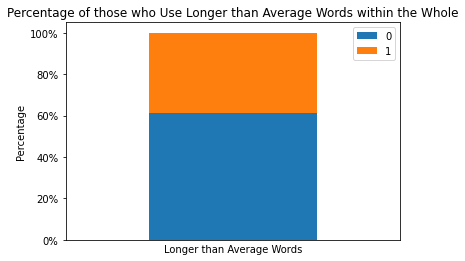

In [398]:
finaldf.assign(dummy=1).groupby(['dummy','uses_longer_than_average_words']).size().groupby(level=0) \
.apply(lambda x: 100 * x / x.sum()).to_frame().unstack().plot(kind='bar', stacked=True, legend=False)
plt.xlabel('Longer than Average Words')
plt.xticks([])
plt.ylabel('Percentage')
plt.legend(finaldf.groupby(['education_code']).count().index)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Percentage of those who Use Longer than Average Words within the Whole")
#plt.show() 

Text(0.5, 1.0, 'Count of Drinker/Smoker Types')

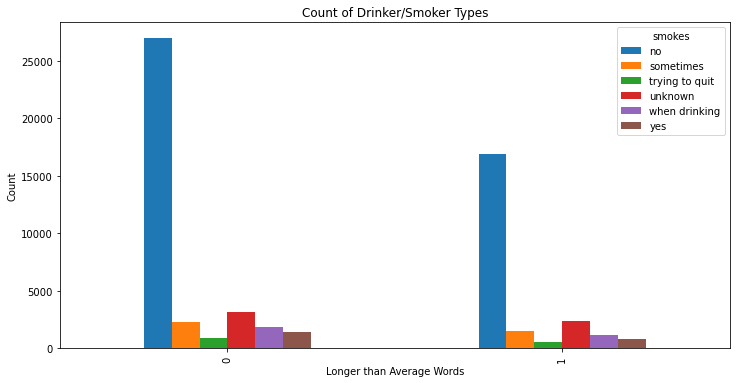

In [401]:
df_pivot = pd.pivot_table(finaldf.groupby(['uses_longer_than_average_words','smokes']).size().to_frame().reset_index().rename(columns={0:'count'}),
values="count",
index="uses_longer_than_average_words",
columns="smokes",
aggfunc=np.sum
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(12, 6)
# Change the axes labels
ax.set_xlabel("Longer than Average Words")
ax.set_ylabel("Count")
ax.set_title('Count of Drinker/Smoker Types')

Text(0.5, 1.0, 'Count of Long Words/Education Types')

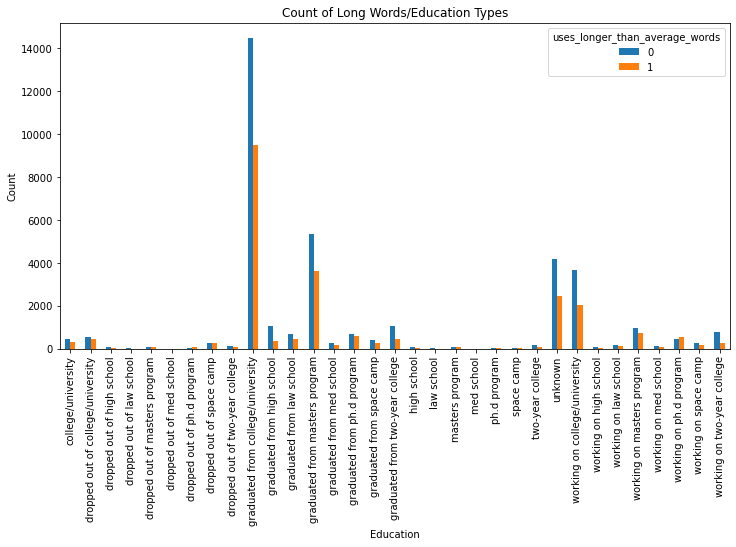

In [403]:
df_pivot = pd.pivot_table(finaldf.groupby(['uses_longer_than_average_words','education']).size().to_frame().reset_index().rename(columns={0:'count'}),
values="count",
index="education",
columns="uses_longer_than_average_words",
aggfunc=np.sum
)

# Plot a bar chart using the DF
ax = df_pivot.plot(kind="bar")
# Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(12, 6)
# Change the axes labels
ax.set_xlabel("Education")
ax.set_ylabel("Count")
ax.set_title('Count of Long Words/Education Types')

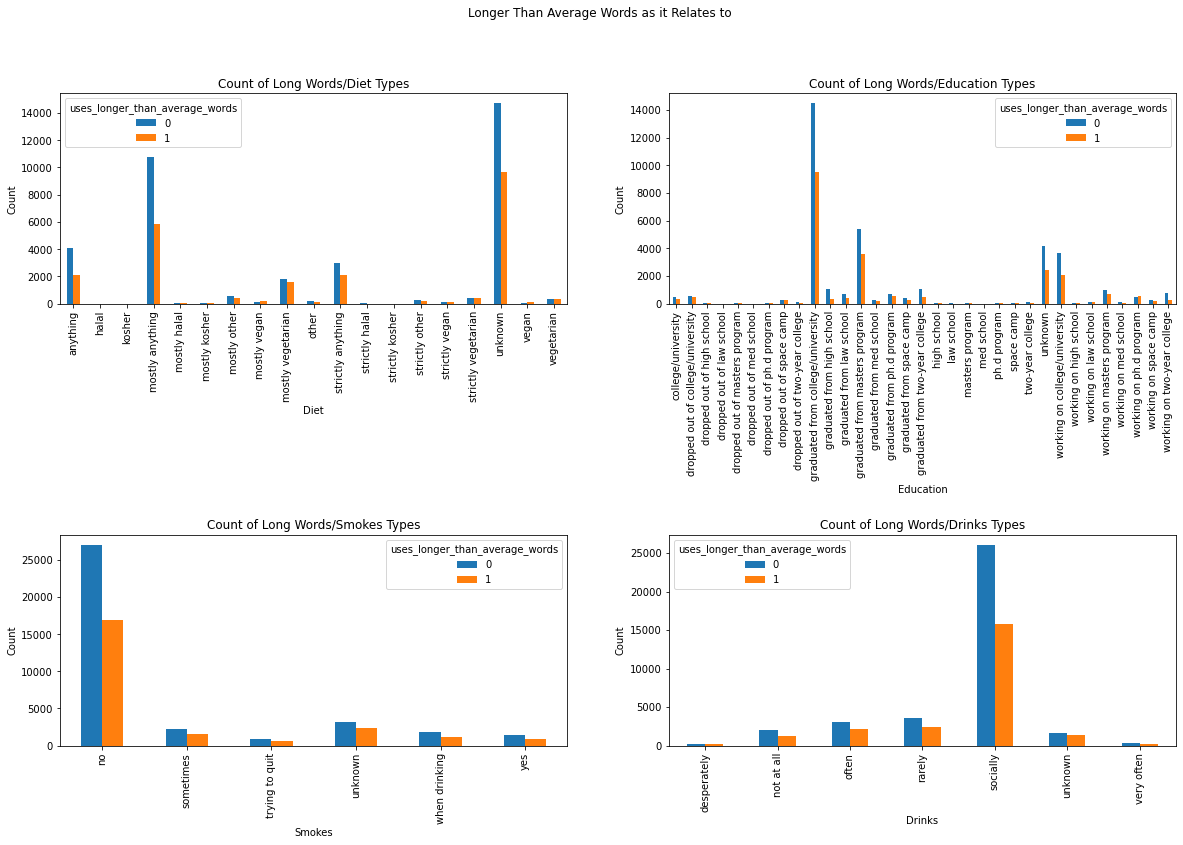

In [462]:

fig = plt.figure(figsize=(20,12))

#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
fig.suptitle('Longer Than Average Words as it Relates to')

ax1 = fig.add_subplot(221)
df_pivot = pd.pivot_table(finaldf.groupby(['uses_longer_than_average_words','diet']).size().to_frame().reset_index().rename(columns={0:'count'}),
values="count",
index="diet",
columns="uses_longer_than_average_words",
aggfunc=np.sum
)
# Plot a bar chart using the DF
df_pivot.plot(kind="bar", ax=ax1)
# Get a Matplotlib figure from the axes object for formatting purposes
#fig = ax.get_figure()
# Change the plot dimensions (width, height)
#fig.set_size_inches(12, 6)
# Change the axes labels
ax1.set_xlabel("Diet")
ax1.set_ylabel("Count")
ax1.set_title('Count of Long Words/Diet Types')

ax2 = fig.add_subplot(222)

df_pivot2 = pd.pivot_table(finaldf.groupby(['uses_longer_than_average_words','education']).size().to_frame().reset_index().rename(columns={0:'count'}),
values="count",
index="education",
columns="uses_longer_than_average_words",
aggfunc=np.sum
)
df_pivot2.plot(kind="bar", ax=ax2)
ax2.set_xlabel("Education")
ax2.set_ylabel("Count")
ax2.set_title('Count of Long Words/Education Types')


ax3 = fig.add_subplot(223)

df_pivot3 = pd.pivot_table(finaldf.groupby(['uses_longer_than_average_words','smokes']).size().to_frame().reset_index().rename(columns={0:'count'}),
values="count",
index="smokes",
columns="uses_longer_than_average_words",
aggfunc=np.sum
)
ax3 = df_pivot3.plot(kind="bar", ax=ax3)
ax3.set_xlabel("Smokes")
ax3.set_ylabel("Count")
ax3.set_title('Count of Long Words/Smokes Types')


ax4 = fig.add_subplot(224)

df_pivot4 = pd.pivot_table(finaldf.groupby(['uses_longer_than_average_words','drinks']).size().to_frame().reset_index().rename(columns={0:'count'}),
values="count",
index="drinks",
columns="uses_longer_than_average_words",
aggfunc=np.sum
)
df_pivot4.plot(kind="bar", ax=ax4)
ax4.set_xlabel("Drinks")
ax4.set_ylabel("Count")
ax4.set_title('Count of Long Words/Drinks Types')

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=1.1)
#fig.pa

### Normalize your Data!


In order to get accurate results, we should make sure our numerical data all has the same weight.


For our Zodiac features, we used:


```
feature_data = all_data[['smokes_code', 'drinks_code', 'drugs_code', 'essay_len', 'avg_word_length']]


x = feature_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)


feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)
```

**we will have the following features**
- signs (map code number)
- serious about astrology (0,1)
- drinks (map code number)
- serious about religion (0,1)
- diet code (map code number)
- smokes code (map code number)
- education code (map code number)

**target is below**
- uses_longer_than_average_words (0,1)

In [357]:
finaldf.columns

Index(['index', 'age', 'body_type', 'diet', 'drinks', 'drugs', 'education',
       'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6',
       'essay7', 'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status',
       'sign_format_type', 'sign_selection', 'essay_len', 'drinks_code',
       'signs_code', 'diet_code', 'smokes_code', 'education_code',
       'serious_about_religion', 'serious_about_astrology', 'text',
       'words_count', 'words', 'average_length_of_words',
       'uses_longer_than_average_words'],
      dtype='object')

In [358]:
feature_data = finaldf[['signs_code','serious_about_astrology','drinks_code','serious_about_religion','diet_code','smokes_code','education_code']]
x = feature_data.values
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
feature_data = pd.DataFrame(x_scaled, columns = feature_data.columns)

In [359]:
feature_data

,signs_code,serious_about_astrology,drinks_code,serious_about_religion,diet_code,smokes_code,education_code
0,0.833333,1.0,0.000000,0.0,0.166667,0.4,0.09375
1,0.750000,1.0,0.333333,0.0,0.277778,0.0,0.50000
2,0.916667,0.0,0.000000,0.0,0.111111,0.0,0.03125
3,0.916667,1.0,0.000000,0.0,0.388889,0.0,0.09375
4,0.944444,1.0,0.000000,0.0,0.000000,0.0,0.00000
...,...,...,...,...,...,...,...
59941,0.750000,1.0,0.000000,0.0,0.000000,0.0,0.00000
59942,0.694444,0.0,0.333333,0.0,0.055556,0.0,0.09375
59943,0.972222,0.0,0.500000,0.0,0.055556,0.0,0.03125
59944,0.694444,1.0,0.000000,0.0,0.055556,1.0,0.09375


In [360]:
len(feature_data[~feature_data['signs_code'].isna()])

59946

In [361]:
len(feature_data[feature_data['signs_code'].isna()])

0

#### Correlation Matrix to Determine which Features Inc as others Inc, Dec as others Dec, or Do the Opposite to Each Other

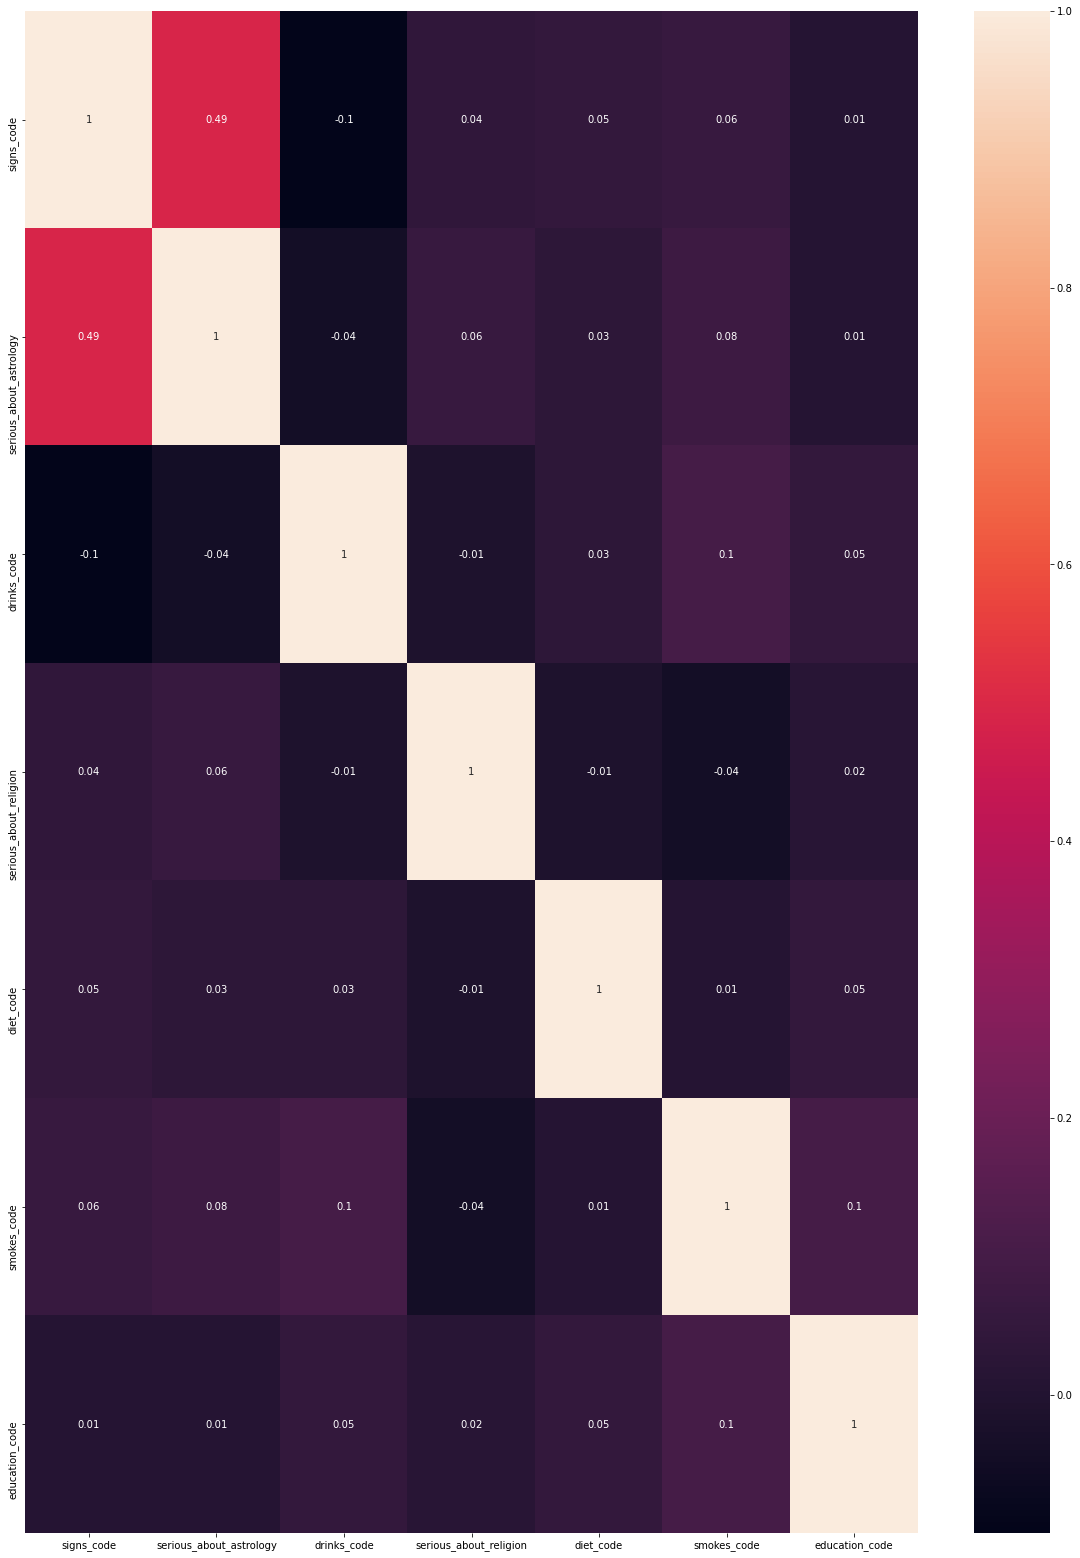

In [368]:
correlation_matrix = feature_data.corr().round(2)

fig = plt.figure(1, figsize=(20, 28))
ax = sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

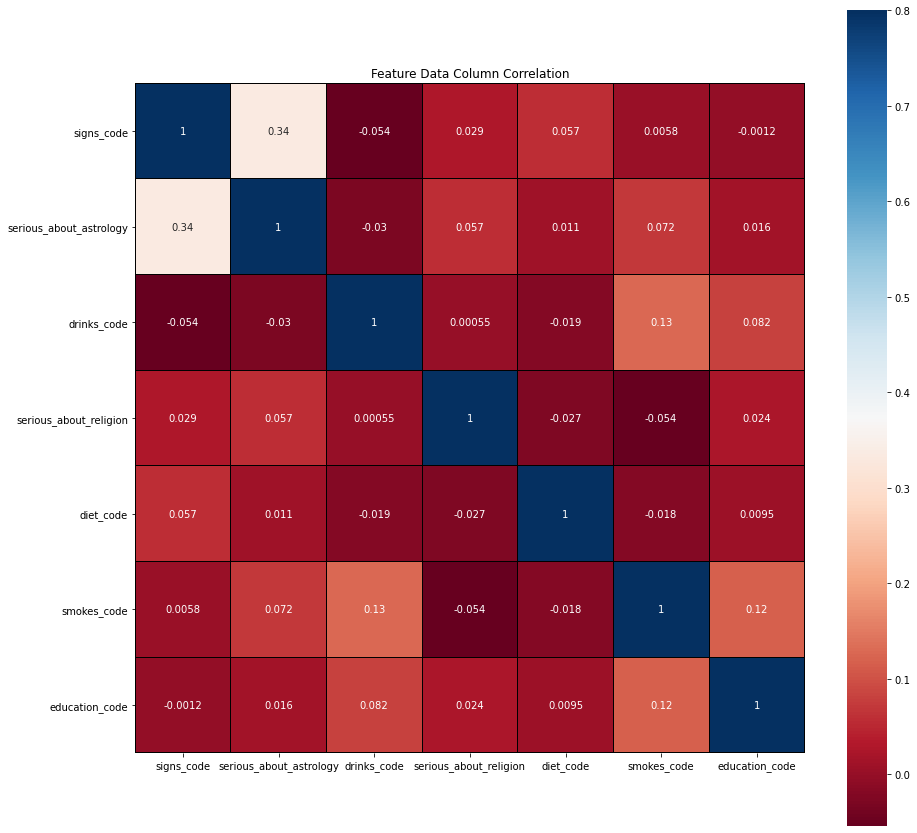

In [370]:
corr = feature_data.corr(method='spearman')
plt.figure(figsize=(15,15))
plt.title('Feature Data Column Correlation')
sns.heatmap(corr, vmax=0.8, linewidth=0.01, square=True, annot=True, cmap='RdBu', linecolor='black')
plt.savefig('Correlation Of Feature Columns.png')

### Use Classification Techniques


We have learned how to perform classification in a few different ways.


- We learned about K-Nearest Neighbors by exploring IMDB ratings of popular movies 
- We learned about Support Vector Machines by exploring baseball statistics
- We learned about Naive Bayes by exploring Amazon Reviews


Some questions we used classification to tackle were:


- Can we predict sex with education level and income??
- Can we predict education level with essay text word counts?

#### K nearest neighbors

In [256]:
start = time.time()
largest = {'accuracy':0, 'recall':0, 'precision':0, 'f1score':0, 'predictions_data':0, 'y_test_data':0, 'k':1, 'columns':'columns', 'i':1}
scores=[]
columns=[]
k_list = []
number_list=[]
recall_list=[]
precision_list=[]
f1score_list=[]
predictions_list=[]
y_test_data=[]
for k in range(1,10):
    for i in range(1,20):
        for number in range(4,5):
            
            data = feature_data
            data = data.sample(n=number,axis='columns')
            labels = finaldf[['uses_longer_than_average_words']]
            #scaled_data = scale(data, axis=0)
            #x_train, x_test, y_train, y_test
            #random state =1 means that the split will be the same every time this is executed
            train_data, test_data, train_labels, test_labels = train_test_split(data, 
                                                                    labels, 
                                                                    test_size = 0.2, 
                                                                    random_state = 1)
            #y_test_data.append(test_labels)
            classifier = KNeighborsClassifier(n_neighbors = k)
            classifier.fit(train_data, np.ravel(train_labels, order='C'))
            
            score = classifier.score(test_data, test_labels)
            scores.append(score)
            #add in functionality for precision, etc by first adding a list at the top and adding to dictionary then adding additions to the conditional statement below
            predictions = classifier.predict(test_data)
            #predictions_list.append(predictions)
            #score mentioned above is "accuracy score"
            recall = recall_score(test_labels,predictions)
            recall_list.append(recall_score(test_labels, predictions))
            precision = precision_score(test_labels,predictions)
            precision_list.append(precision_score(test_labels, predictions))
            f1score = f1_score(test_labels, predictions)
            f1score_list.append(f1_score(test_labels, predictions))
            
            columns.append([colname for colname in data.columns])
            k_list.append(k)
            number_list.append(number)

            if (score > largest['accuracy']):
                largest['accuracy'] = score
                largest['recall'] = recall
                largest['precision'] = precision
                largest['f1score'] = f1score
                largest['predictions_data'] = predictions
                largest['y_test_data'] = test_labels
                largest['k'] = k
                largest['columns'] = data.columns
                largest['i'] = i
end = time.time()
print(end - start)

756.7337713241577


In [144]:
largest

{'accuracy': 0.611509591326105,
 'recall': 0.06224246367382347,
 'precision': 0.46215780998389694,
 'f1score': 0.10970948012232415,
 'predictions_data': array([0, 0, 0, ..., 0, 0, 0]),
 'y_test_data':        uses_longer_than_average_words
 16912                               0
 13297                               0
 2604                                0
 39269                               0
 12225                               0
 ...                               ...
 55349                               1
 12471                               1
 27690                               1
 44786                               0
 14455                               0
 
 [11990 rows x 1 columns],
 'k': 2,
 'columns': Index(['serious_about_astrology', 'serious_about_religion', 'education_code',
        'drinks_code'],
       dtype='object'),
 'i': 2}

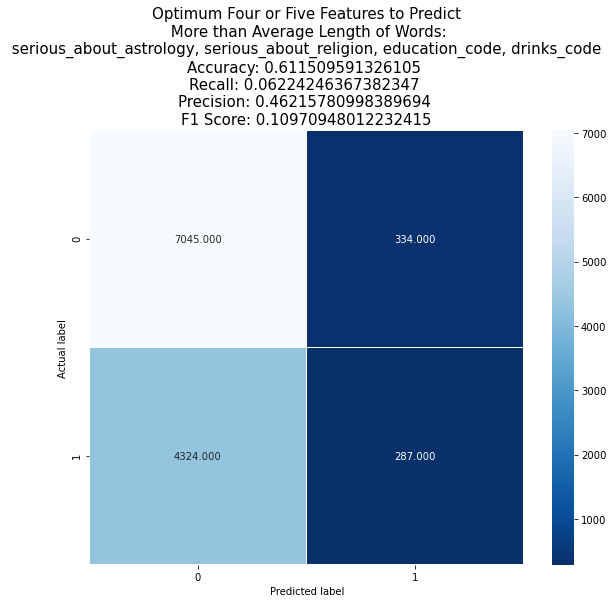

In [148]:
cm = metrics.confusion_matrix(largest['y_test_data'], largest['predictions_data'])
#print(cm)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Optimum Four or Five Features to Predict\n More than Average Length of Words:\n {0} \n'.format(", ".join(largest['columns'])) \
+ 'Accuracy: {0} \n'.format(largest['accuracy']) \
+ 'Recall: {0} \n'.format(largest['recall']) \
+ 'Precision: {0} \n'.format(largest['precision']) \
+ 'F1 Score: {0}'.format(largest['f1score'])
plt.title(all_sample_title, size = 15);

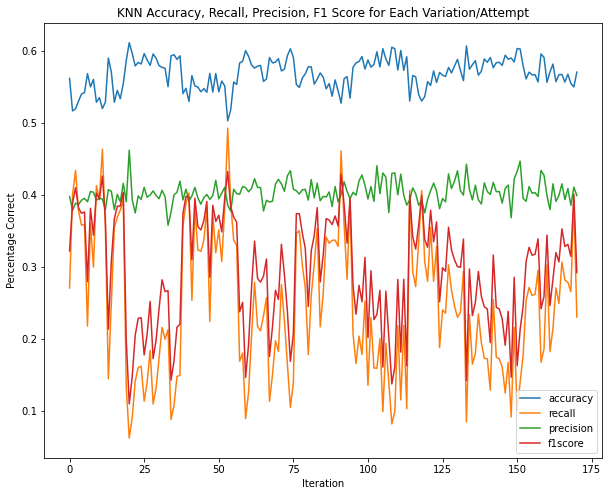

In [146]:
plt.figure(figsize=(10,8))
plt.plot(range(len(scores)),scores)
plt.plot(range(len(recall_list)),recall_list)
plt.plot(range(len(precision_list)),precision_list)
plt.plot(range(len(f1score_list)),f1score_list)
plt.legend(['accuracy','recall','precision','f1score'])
plt.xlabel('Iteration')
plt.ylabel('Percentage Correct')
plt.title('KNN Accuracy, Recall, Precision, F1 Score for Each Variation/Attempt')
plt.show()


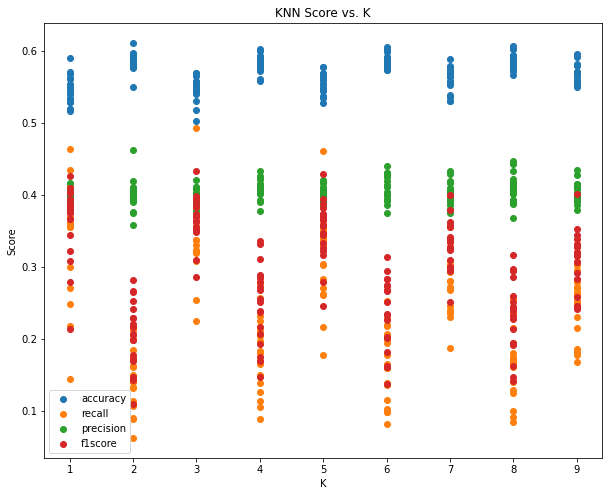

In [147]:
plt.figure(figsize=(10,8))
plt.scatter(k_list,scores)
plt.scatter(k_list,recall_list)
plt.scatter(k_list,precision_list)
plt.scatter(k_list,f1score_list)
plt.legend(['accuracy','recall','precision','f1score'])
plt.xlabel('K')
plt.ylabel('Score')
plt.title('KNN Score vs. K')
plt.show()

#### Decision Tree

In [191]:
from sklearn.tree import DecisionTreeClassifier

C:\Users\rmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


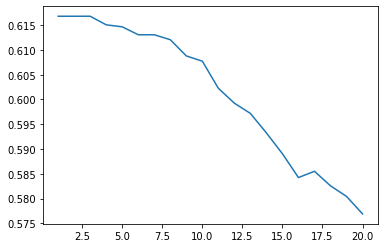

In [213]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)
scores = []
recall_list=[]
precision_list=[]
f1score_list=[]
largest = {'accuracy':0, 'recall':0, 'precision':0, 'f1score':0, 'predictions_data':0, 'y_test_data':0, 'columns':'columns', 'i':1}
for i in range(1,21):
    tree = DecisionTreeClassifier(random_state=1, max_depth = i)
    tree.fit(train_data, train_labels)
    scores.append(tree.score(test_data, test_labels))
    predictions = tree.predict(test_data)
    recall = recall_score(test_labels,predictions)
    recall_list.append(recall_score(test_labels, predictions))
    precision = precision_score(test_labels,predictions)
    precision_list.append(precision_score(test_labels, predictions))
    f1score = f1_score(test_labels, predictions)
    f1score_list.append(f1_score(test_labels, predictions))

plt.plot(range(1,21),scores)
plt.show()

In [255]:
start = time.time()
largest = {'accuracy':0, 'recall':0, 'precision':0, 'f1score':0, 'predictions_data':0, 'y_test_data':0, 'k':1, 'columns':'columns', 'treedepth':1, 'run_number':1}
scores=[]
columns=[]
k_list = []
number_list=[]
recall_list=[]
precision_list=[]
f1score_list=[]
predictions_list=[]
y_test_data=[]
for run_number in range(1,20):
    for treedepth in range(1,21):
        for number in range(4,5):

            data = feature_data
            data = data.sample(n=number,axis='columns')
            labels = finaldf[['uses_longer_than_average_words']]
            #scaled_data = scale(data, axis=0)
            #x_train, x_test, y_train, y_test
            #random state =1 means that the split will be the same every time this is executed
            train_data, test_data, train_labels, test_labels = train_test_split(data, 
                                                                        labels, 
                                                                        test_size = 0.2, 
                                                                        random_state = 1)
            #y_test_data.append(test_labels)
            tree = DecisionTreeClassifier(random_state=1, max_depth = treedepth)
            tree.fit(train_data, train_labels)

            score = tree.score(test_data, test_labels)
            scores.append(score)
            #add in functionality for precision, etc by first adding a list at the top and adding to dictionary then adding additions to the conditional statement below
            predictions = tree.predict(test_data)
            #predictions_list.append(predictions)
            #score mentioned above is "accuracy score"
            recall = recall_score(test_labels,predictions)
            recall_list.append(recall_score(test_labels, predictions))
            precision = precision_score(test_labels,predictions)
            precision_list.append(precision_score(test_labels, predictions))
            f1score = f1_score(test_labels, predictions)
            f1score_list.append(f1_score(test_labels, predictions))

            columns.append([colname for colname in data.columns])
            k_list.append(k)
            number_list.append(number)

            if (score > largest['accuracy']):
                largest['accuracy'] = score
                largest['recall'] = recall
                largest['precision'] = precision
                largest['f1score'] = f1score
                largest['predictions_data'] = predictions
                largest['y_test_data'] = test_labels
                largest['k'] = k
                largest['columns'] = data.columns
                largest['treedepth'] = treedepth
                largest['run_number'] = run_number

end = time.time()
print(end - start)

C:\Users\rmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

C:\Users\rmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

48.25349688529968


In [225]:
largest

{'accuracy': 0.6180150125104253,
 'recall': 0.026024723487312947,
 'precision': 0.5741626794258373,
 'f1score': 0.04979253112033195,
 'predictions_data': array([0, 0, 0, ..., 0, 1, 0]),
 'y_test_data':        uses_longer_than_average_words
 16912                               0
 13297                               0
 2604                                0
 39269                               0
 12225                               0
 ...                               ...
 55349                               1
 12471                               1
 27690                               1
 44786                               0
 14455                               0
 
 [11990 rows x 1 columns],
 'k': 9,
 'columns': Index(['signs_code', 'smokes_code', 'serious_about_astrology', 'diet_code'], dtype='object'),
 'treedepth': 8,
 'run_number': 5}

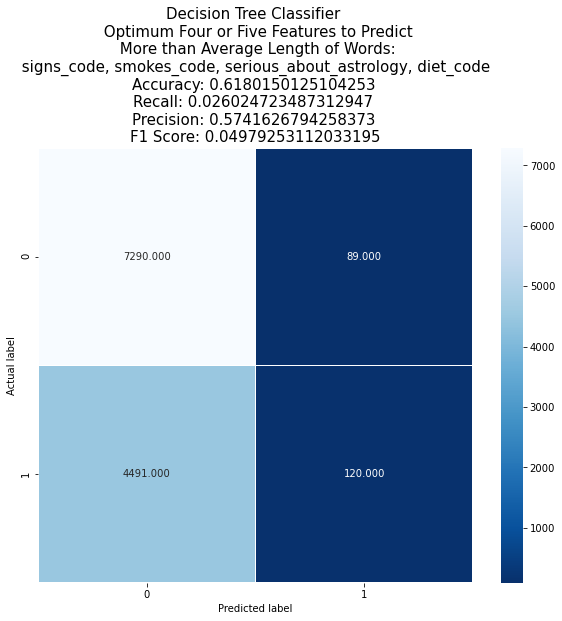

In [230]:
cm = metrics.confusion_matrix(largest['y_test_data'], largest['predictions_data'])
#print(cm)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Decision Tree Classifier \n Optimum Four or Five Features to Predict\n More than Average Length of Words:\n {0} \n'.format(", ".join(largest['columns'])) \
+ 'Accuracy: {0} \n'.format(largest['accuracy']) \
+ 'Recall: {0} \n'.format(largest['recall']) \
+ 'Precision: {0} \n'.format(largest['precision']) \
+ 'F1 Score: {0}'.format(largest['f1score'])
plt.title(all_sample_title, size = 15);

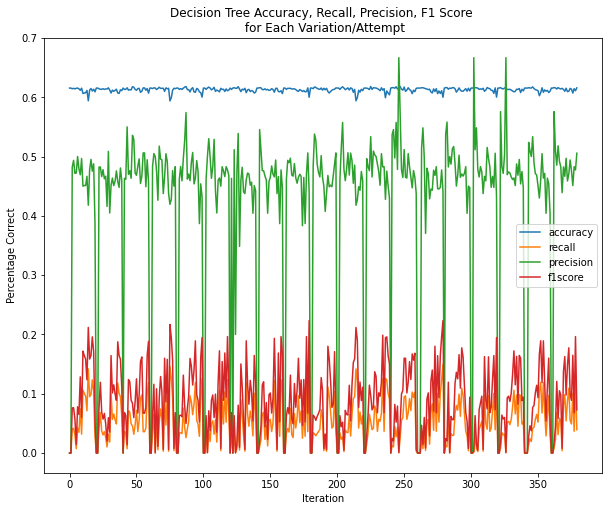

In [228]:
plt.figure(figsize=(10,8))
plt.plot(range(len(scores)),scores)
plt.plot(range(len(recall_list)),recall_list)
plt.plot(range(len(precision_list)),precision_list)
plt.plot(range(len(f1score_list)),f1score_list)
plt.legend(['accuracy','recall','precision','f1score'])
plt.xlabel('Iteration')
plt.ylabel('Percentage Correct')
plt.title('Decision Tree Accuracy, Recall, Precision, F1 Score \n for Each Variation/Attempt')
plt.show()

#### Random Forest

In [253]:
import time

In [237]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [254]:
start = time.time()
largest = {'accuracy':0, 'recall':0, 'precision':0, 'f1score':0, 'predictions_data':0, 'y_test_data':0, 'k':1, 'columns':'columns', 'run_number':1, 'modelcoef_to_col':0}
scores=[]
columns=[]
k_list = []
number_list=[]
recall_list=[]
precision_list=[]
f1score_list=[]
predictions_list=[]
y_test_data=[]
model_coef=[]
for run_number in range(1,20):
    for number in range(4,5):

        data = feature_data
        data = data.sample(n=number,axis='columns')
        labels = finaldf[['uses_longer_than_average_words']]
        #scaled_data = scale(data, axis=0)
        #x_train, x_test, y_train, y_test
        #random state =1 means that the split will be the same every time this is executed
        train_data, test_data, train_labels, test_labels = train_test_split(data, 
                                                                        labels, 
                                                                        test_size = 0.2, 
                                                                        random_state = 1)
        #y_test_data.append(test_labels)
        forest = RandomForestClassifier(random_state=1)
        forest.fit(train_data, np.ravel(train_labels, order='C'))
        #coefarray = forest.feature_importances_
        #print(coefarray.tolist())
        model_coef = list(zip(test_data.columns, forest.feature_importances_.tolist()))
        score = forest.score(test_data, test_labels)
        scores.append(score)
        #add in functionality for precision, etc by first adding a list at the top and adding to dictionary then adding additions to the conditional statement below
        predictions = forest.predict(test_data)
        #predictions_list.append(predictions)
        #score mentioned above is "accuracy score"
        recall = recall_score(test_labels,predictions)
        recall_list.append(recall_score(test_labels, predictions))
        precision = precision_score(test_labels,predictions)
        precision_list.append(precision_score(test_labels, predictions))
        f1score = f1_score(test_labels, predictions)
        f1score_list.append(f1_score(test_labels, predictions))

        columns.append([colname for colname in data.columns])
        k_list.append(k)
        number_list.append(number)

        if (score > largest['accuracy']):
            largest['accuracy'] = score
            largest['recall'] = recall
            largest['precision'] = precision
            largest['f1score'] = f1score
            largest['predictions_data'] = predictions
            largest['y_test_data'] = test_labels
            largest['k'] = k
            largest['columns'] = data.columns
            largest['run_number'] = run_number
            largest['modelcoef_to_col'] = model_coef

end = time.time()
print(end - start)

70.11354517936707


In [250]:
largest

{'accuracy': 0.6159299416180151,
 'recall': 0.07850791585339406,
 'precision': 0.5041782729805014,
 'f1score': 0.13586038656408334,
 'predictions_data': array([0, 0, 0, ..., 0, 1, 0]),
 'y_test_data':        uses_longer_than_average_words
 16912                               0
 13297                               0
 2604                                0
 39269                               0
 12225                               0
 ...                               ...
 55349                               1
 12471                               1
 27690                               1
 44786                               0
 14455                               0
 
 [11990 rows x 1 columns],
 'k': 9,
 'columns': Index(['serious_about_astrology', 'serious_about_religion', 'education_code',
        'diet_code'],
       dtype='object'),
 'run_number': 16,
 'modelcoef_to_col': [('serious_about_astrology', 0.04290141136627745),
  ('serious_about_religion', 0.057412579783190094),
  ('education_c

In [252]:
print(largest['modelcoef_to_col'])

[('serious_about_religion', 0.17477994628365465), ('signs_code', 0.508683489569639), ('smokes_code', 0.26951252266326037), ('serious_about_astrology', 0.047024041483445855)]


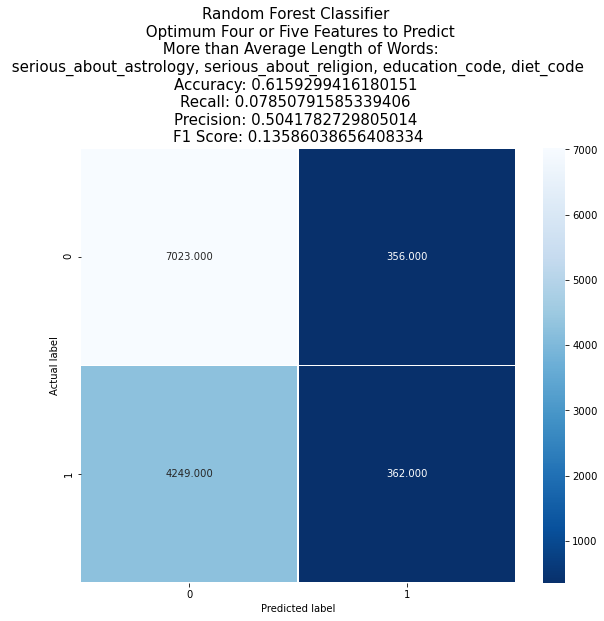

In [241]:
cm = metrics.confusion_matrix(largest['y_test_data'], largest['predictions_data'])
#print(cm)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Random Forest Classifier \n Optimum Four or Five Features to Predict\n More than Average Length of Words:\n {0} \n'.format(", ".join(largest['columns'])) \
+ 'Accuracy: {0} \n'.format(largest['accuracy']) \
+ 'Recall: {0} \n'.format(largest['recall']) \
+ 'Precision: {0} \n'.format(largest['precision']) \
+ 'F1 Score: {0}'.format(largest['f1score'])
plt.title(all_sample_title, size = 15);

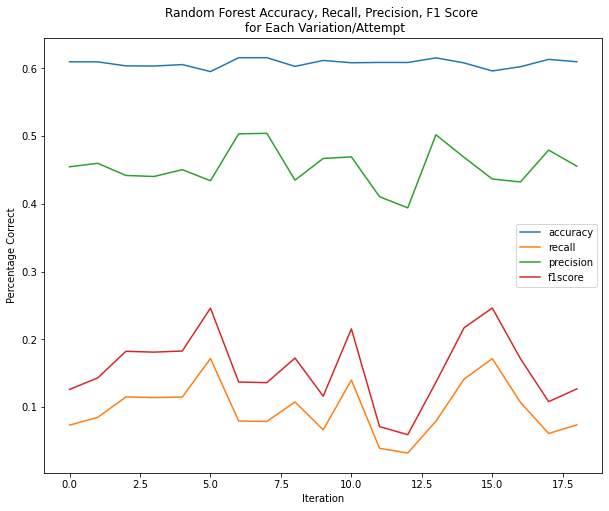

In [242]:
plt.figure(figsize=(10,8))
plt.plot(range(len(scores)),scores)
plt.plot(range(len(recall_list)),recall_list)
plt.plot(range(len(precision_list)),precision_list)
plt.plot(range(len(f1score_list)),f1score_list)
plt.legend(['accuracy','recall','precision','f1score'])
plt.xlabel('Iteration')
plt.ylabel('Percentage Correct')
plt.title('Random Forest Accuracy, Recall, Precision, F1 Score \n for Each Variation/Attempt')
plt.show()

#### Bayes -  does not work for my problem or i am implementing incorrectly

In [199]:
from sklearn.naive_bayes import MultinomialNB

C:\Users\rmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

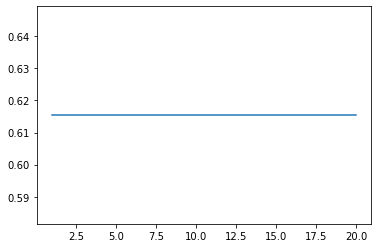

In [236]:
scores = []
recall_list=[]
precision_list=[]
f1score_list=[]
largest = {'accuracy':0, 'recall':0, 'precision':0, 'f1score':0, 'predictions_data':0, 'y_test_data':0, 'columns':'columns', 'i':1}
for i in range(1,21):
    data = feature_data
    data = data.sample(n=number,axis='columns')
    labels = finaldf[['uses_longer_than_average_words']]
    train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state=1)
    classifier = MultinomialNB()
    classifier.fit(train_data, np.ravel(train_labels, order='C'))
    scores.append(classifier.score(test_data, test_labels))
    predictions = classifier.predict(test_data)
    recall = recall_score(test_labels,predictions)
    recall_list.append(recall_score(test_labels, predictions))
    precision = precision_score(test_labels,predictions)
    precision_list.append(precision_score(test_labels, predictions))
    f1score = f1_score(test_labels, predictions)
    f1score_list.append(f1_score(test_labels, predictions))

plt.plot(range(1,21),scores)
plt.show()

#### SVM - didn't work. from research it could be that the data set is too large for svm

In [ ]:
largest = {'value':0, 'gamma':1, 'C':1}
for gamma in range(1,2):
    for C in range(1,2):
        feature_data = feature_data
        target_data = finaldf[['uses_longer_than_average_words']]
        
        # Scale the feature data so it has mean = 0 and standard deviation = 1
        # define standard scaler
        #scaler = StandardScaler()
        # transform data
        #scaled_features = scaler.fit_transform(features)
        
        # Perform train, test, split
        x_train, x_test, y_train, y_test = train_test_split(feature_data, 
                                                            target_data, 
                                                            test_size=0.2, 
                                                            random_state=200)
        
        classifier = SVC(kernel = "rbf",gamma=gamma,C=C,probability=True)
        classifier.fit(x_train, np.ravel(y_train,order='C')) #see https://stackoverflow.com/questions/34165731/a-column-vector-y-was-passed-when-a-1d-array-was-expected
        score = classifier.score(x_test, y_test)

        if (score > largest['value']):
            largest['value'] = score
            largest['gamma'] = gamma
            largest['C'] = C
        #print(gamma, C)
    print("one gamma, one C try")
print(largest)

feature_data = feature_data
target_data = finaldf[['uses_longer_than_average_words']]

# Scale the feature data so it has mean = 0 and standard deviation = 1
# define standard scaler
#scaler = StandardScaler()
# transform data
#scaled_features = scaler.fit_transform(features)

# Perform train, test, split
x_train, x_test, y_train, y_test = train_test_split(feature_data, 
                                                    survival, 
                                                    test_size=0.2, 
                                                    random_state=200)


classifier = SVC(kernel = "rbf",gamma=largest['gamma'],C=largest['C'], probability=True)
classifier.fit(x_train, np.ravel(y_train,order='C'))
score = classifier.score(x_test, y_test)
print(score)

In [ ]:
# Perform train, test, split
x_train, x_test, y_train, y_test = train_test_split(feature_data, 
                                                    finaldf[['uses_longer_than_average_words']], 
                                                    test_size=0.2, 
                                                    random_state=1)


classifier = SVC(kernel = "rbf",gamma=4,C=3, probability=True)
classifier.fit(x_train, np.ravel(y_train,order='C'))
score = classifier.score(x_test, y_test)
print(score)

In [ ]:
predictions = classifier.predict(x_test)

#score mentioned above is "accuracy score"
print("Accuracy Score is:", accuracy_score(y_test, predictions))

print("Recall Score is:", recall_score(y_test, predictions))

print("Precision Score is:", precision_score(y_test, predictions))

print("f1 Score is:", f1_score(y_test, predictions))

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Use Regression Techniques


We have learned how to perform Multiple Linear Regression by playing with StreetEasy apartment data. Is there a way we can apply the techniques we learned to this dataset?


Some questions we used regression to tackle were:


- Predict income with length of essays and average word length?
- Predict age with the frequency of "I" or "me" in essays?


We also learned about K-Nearest Neighbors Regression. Which form of regression works better to answer your question?

#### Multiple Linear Regression
- the ultimate solution is that linear regression is not a good solution for classification problems. logistic regression or knn are the paths to take.

In [99]:
x_train, x_test, y_train, y_test = train_test_split(feature_data, finaldf[['uses_longer_than_average_words']], train_size = 0.8, test_size = 0.2, random_state=1)

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

The first way will be by using the `.score()` method, which provides the R^2 value for our model. Remember, R^2 is the coefficient of determination, or a measure of how much of the variance in our dependent variable, the predicted Yelp rating, is explained by our independent variables, our feature data. R^2 values range from `0` to `1`, with `0` indicating that the created model does not fit our data at all, and with `1` indicating the model perfectly fits our feature data. Call `.score()` on our model with `X_train` and `y_train` as parameters to calculate our training R^2 score. Then call `.score()` again on model with `X_test` and `y_test` as parameters to calculate R^2 for our testing data. What do these R^2 values say about our model? Do you think these features alone are able to effectively predict Yelp ratings?

In [100]:
#R2 Score
model.score(x_train, y_train)

0.006165279923250777

In [101]:
model.score(x_test, y_test)

0.005658639340759608

The scores are very close to 0, which means that they are very unreliable. That information alone will not be able to effectively predict the ratings.

#### Logistic Regression
- logistic regression over linear regression is meant for predicting categorical variables or binary variables while linear regression can predict continuous numbers. my problem of predicting whether a user leverages longer than average words (False - 0, or True - 1) is binary.

In [197]:
largest = {'accuracy':0, 'recall':0, 'precision':0, 'f1score':0, 'predictions_data':0, 'y_test_data':0, 'columns':'columns', 'i':1, 'modelcoef_to_col':0}
scores=[]
columns=[]
#k_list = []
number_list=[]
recall_list=[]
precision_list=[]
f1score_list=[]
predictions_list=[]
y_test_data=[]
model_coef=[]
#for k in range(1,10):
for i in range(1,20):
    for number in range(4,5):
            
        data = feature_data
        data = data.sample(n=number,axis='columns')
        labels = finaldf[['uses_longer_than_average_words']]
        #scaled_data = scale(data, axis=0)
        #x_train, x_test, y_train, y_test
        train_data, test_data, train_labels, test_labels = train_test_split(data, 
                                                                    labels, 
                                                                    test_size = 0.2, 
                                                                    random_state = 1)
        #y_test_data.append(test_labels)
        model = LogisticRegression(max_iter=6000)
        model.fit(train_data, np.ravel(train_labels, order='C'))
        coefarray = model.coef_
        model_coef = list(zip(test_data.columns, np.transpose(model.coef_.tolist()[0])))
        score = model.score(test_data, test_labels)
        scores.append(score)
        #add in functionality for precision, etc by first adding a list at the top and adding to dictionary then adding additions to the conditional statement below
        predictions = model.predict(test_data)
        #predictions_list.append(predictions)
        #score mentioned above is "accuracy score"
        recall = recall_score(test_labels,predictions)
        recall_list.append(recall_score(test_labels, predictions))
        precision = precision_score(test_labels,predictions)
        precision_list.append(precision_score(test_labels, predictions))
        f1score = f1_score(test_labels, predictions)
        f1score_list.append(f1_score(test_labels, predictions))
            
        columns.append([colname for colname in data.columns])
        #k_list.append(k)
        number_list.append(number)

        if (score > largest['accuracy']):
            largest['accuracy'] = score
            largest['recall'] = recall
            largest['precision'] = precision
            largest['f1score'] = f1score
            largest['predictions_data'] = predictions
            largest['y_test_data'] = test_labels
            #largest['k'] = k
            largest['columns'] = data.columns
            largest['i'] = i
            largest['modelcoef_to_col'] = model_coef

C:\Users\rmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmart\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

In [198]:
largest

{'accuracy': 0.6163469557964971,
 'recall': 0.011060507482108002,
 'precision': 0.5604395604395604,
 'f1score': 0.021692896639727774,
 'predictions_data': array([0, 0, 0, ..., 0, 0, 0]),
 'y_test_data':        uses_longer_than_average_words
 16912                               0
 13297                               0
 2604                                0
 39269                               0
 12225                               0
 ...                               ...
 55349                               1
 12471                               1
 27690                               1
 44786                               0
 14455                               0
 
 [11990 rows x 1 columns],
 'columns': Index(['signs_code', 'drinks_code', 'diet_code', 'serious_about_religion'], dtype='object'),
 'i': 9,
 'modelcoef_to_col': [('signs_code', -0.1580555731766104),
  ('drinks_code', 0.3171200044450069),
  ('diet_code', 0.6847453372814007),
  ('serious_about_religion', -0.3095834303531485)]}

**Coefficients only work for regression and not for knn and other classification algs**

though i am still not sure coefficients on my column for my problem set as viewing columns in the context of if one increase does not fit my columns which are just categorical mappings of strings as opposed to numbers or statistics like the stock market

In [151]:
largest['modelcoef_to_col']

[('signs_code', -0.1580555731766103),
 ('serious_about_religion', -0.3095834303531485),
 ('diet_code', 0.6847453372814009),
 ('drinks_code', 0.31712000444500693)]

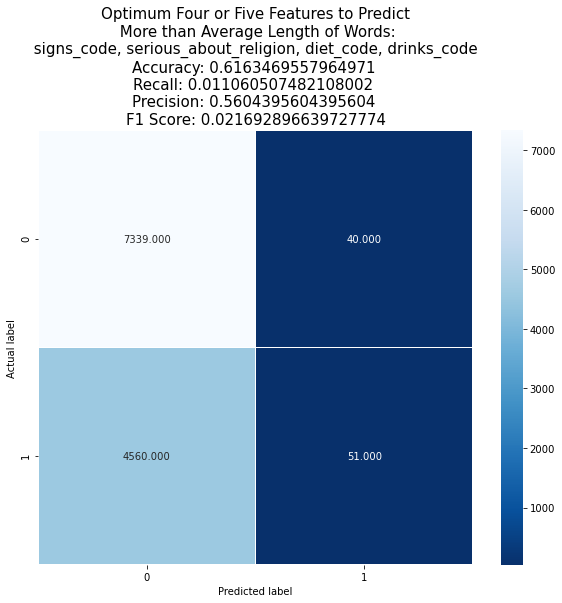

In [152]:
cm = metrics.confusion_matrix(largest['y_test_data'], largest['predictions_data'])
#print(cm)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Optimum Four or Five Features to Predict\n More than Average Length of Words:\n {0} \n'.format(", ".join(largest['columns'])) \
+ 'Accuracy: {0} \n'.format(largest['accuracy']) \
+ 'Recall: {0} \n'.format(largest['recall']) \
+ 'Precision: {0} \n'.format(largest['precision']) \
+ 'F1 Score: {0}'.format(largest['f1score'])
plt.title(all_sample_title, size = 15);

Shows comparable accuracy to the knn however the recall and f1 scores are super low. precision is high at times. when we view the confusion matrix for the data with the highest accuracy we see that the model only predicted 51 people accurately as "true" or people who use longer than average words. This is very low when compared to the KNN.

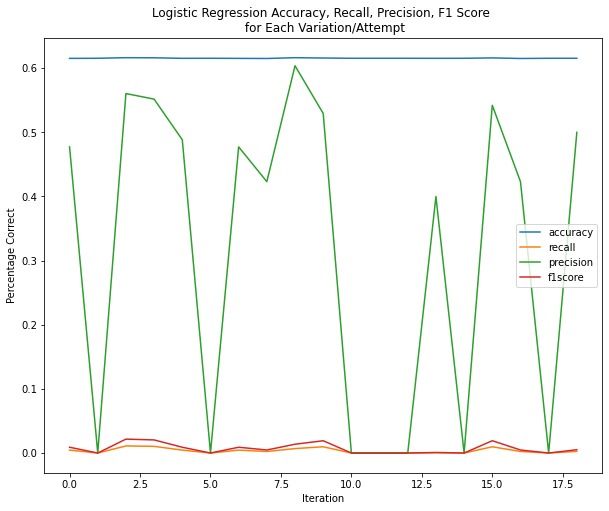

In [153]:
plt.figure(figsize=(10,8))
plt.plot(range(len(scores)),scores)
plt.plot(range(len(recall_list)),recall_list)
plt.plot(range(len(precision_list)),precision_list)
plt.plot(range(len(f1score_list)),f1score_list)
plt.legend(['accuracy','recall','precision','f1score'])
plt.xlabel('Iteration')
plt.ylabel('Percentage Correct')
plt.title('Logistic Regression Accuracy, Recall, Precision, F1 Score \n for Each Variation/Attempt')
plt.show()

### Analyze the Accuracy, Precision and Recall


After you have trained your model and run it, you will probably be curious about how well it did.


Find the accuracy, precision, and recall of each model you used, and create graphs showing how they changed.


For our question of classifying Zodiac signs, one graph we produced showed classification accuracy versus `k` (for K-Nearest Neighbors):
![accuracy vs k](https://s3.amazonaws.com/codecademy-content/programs/machine-learning/capstone/Zodiac_Accuracy.png)


The accuracy we would expect from predicting a Zodiac sign by randomly selecting one would be 1/12, or 0.0833. Our model did not significantly outperform this number. We were unimpressed.

### Create your Presentation


We want to see:


- at least two graphs containing exploration of the dataset
- a statement of your question (or questions!) and how you arrived there 
- the explanation of at least two new columns you created and how you did it
- the comparison between two classification approaches, including a qualitative discussion of simplicity, time to run the model, and accuracy, precision, and/or recall
- the comparison between two regression approaches, including a qualitative discussion of simplicity, time to run the model, and accuracy, precision, and/or recall
- an overall conclusion, with a preliminary answer to your initial question(s), next steps, and what other data you would like to have in order to better answer your question(s)


Good luck!